In [8]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.4/376.0 MB 12.2 MB/s eta 0:00:31
    --------------------------------------- 4.7/376.0 MB 11.9 MB/s eta 0:00:32
    --------------------------------------- 7.3/376.0 MB 11.6 MB/s eta 0:00:32
   - -------------------------------------- 9.7/376.0 MB 11.8 MB/s eta 0:00:31
   - -------------------------------------- 12.1/376.0 MB 11.8 MB/s eta 0:00:31
   - -------------------------------------- 14.7/376.0 MB 11.8 MB/s eta 0:00:31
   - -------------------------------------- 17.0/376.0 MB 11.8 MB/s eta 0:00:31
   -- ------------------------------------- 19.4/376.0 MB 11.8 MB/s eta 0:00:31
   -- ------------------------------------- 22.0/376.0 MB 11.8 MB/s eta 0:00:30
   -- ------------------------------------- 24.6/376.0 MB 11.8 MB/s eta 0:00:30
   -- ------------------------------------- 27.0/376.0 MB 11.8 MB/s eta 0:00:30
   --- ------------------------------------ 29.6/376

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST-Datensatz laden
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Klassenbezeichnungen
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Daten vorverarbeiten
train_images = train_images / 255.0
test_images = test_images / 255.0

# Modell erstellen
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Modell trainieren
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Modell evaluieren
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTestgenauigkeit: {test_acc:.4f}')

# Vorhersage für ein einzelnes Bild
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7819 - loss: 0.6277 - val_accuracy: 0.8559 - val_loss: 0.4175
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8618 - loss: 0.3849 - val_accuracy: 0.8617 - val_loss: 0.3843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.3453 - val_accuracy: 0.8596 - val_loss: 0.3962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8869 - loss: 0.3107 - val_accuracy: 0.8666 - val_loss: 0.3668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8922 - loss: 0.2916 - val_accuracy: 0.8752 - val_loss: 0.3498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8959 - loss: 0.2840 - val_accuracy: 0.8815 - val_loss: 0.3368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8992 - loss: 0.2705 - val_accuracy: 0.8756 - val_loss: 0.3513
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9067 - loss: 0.2490 - 

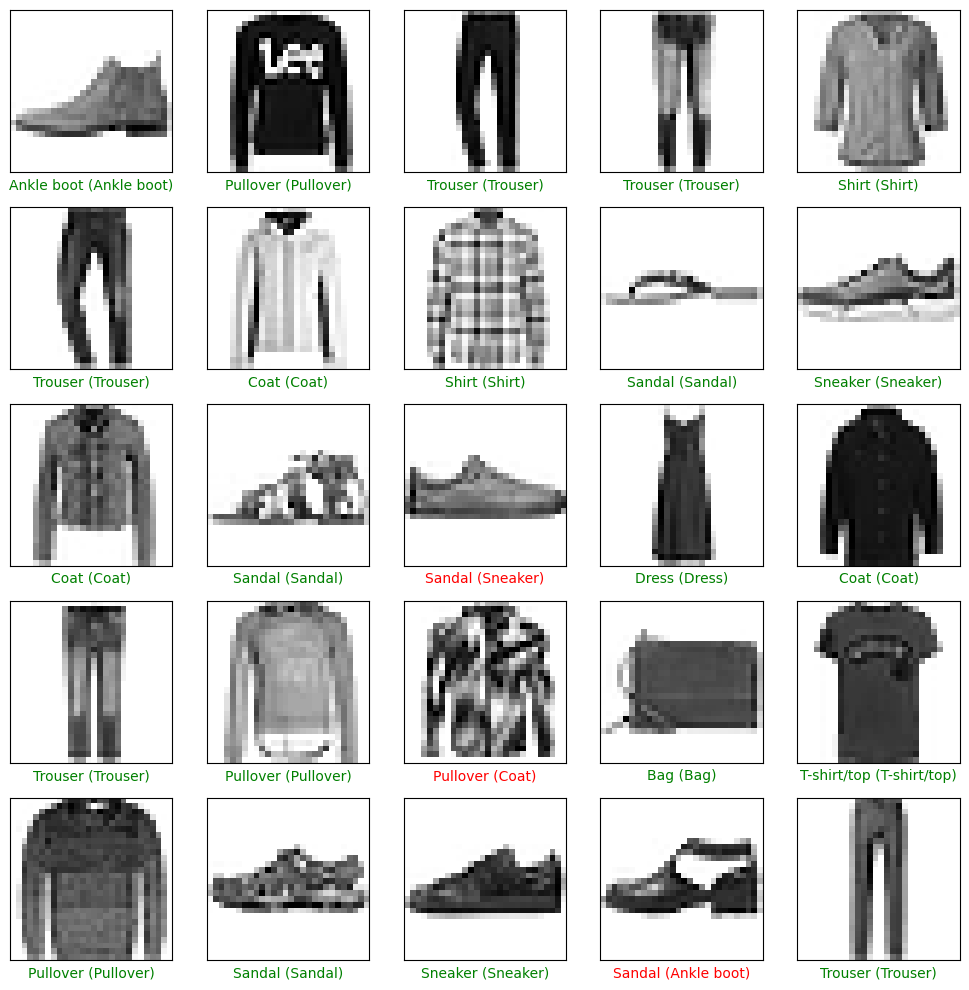

In [11]:
# Visualisierung der ersten 25 Testbilder mit Vorhersagen
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.tight_layout()
plt.show()

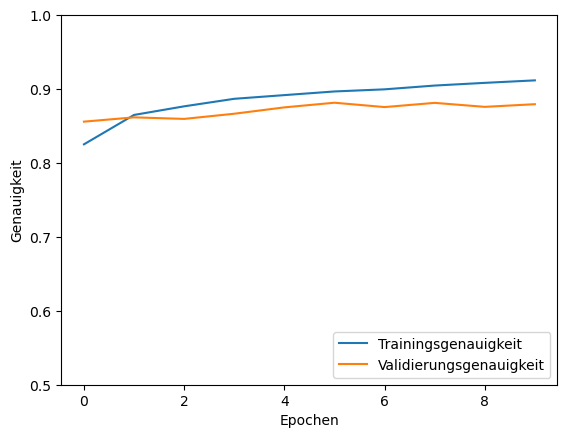

In [12]:
# Trainingsverlauf visualisieren
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()